# 2D binning in x, Q2

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
data = pd.read_csv("./CLAS12_hadronic_and_partonic.csv")

# x and q2 2D binning
x_q2_bins = np.array([
    [0.12,1.62],#0
    [0.21,1.77],#1
    [0.16,2.19],#2
    [0.26,2.22],#3
    [0.2,2.73],#4
    [0.32,2.82],#5
    [0.29,3.76],#6
    [0.39,3.8],#7
    [0.46,3.8],#8
    [0.398,5.1],#9
    [0.5,5.1], #10
    [0.42,5.9], #11
    [0.59,7.5] #12
])
x_q2_edges = np.array([
    [[0,0.182],[0,4.5]], # 0
    [[0.182,1],[0,4.5]], #1
    [[0,0.23],[4.5,5.6]], #2
    [[0.23,1],[4.5,5.6]], #3
    [[0,0.29],[5.6,7.6]], #4
    [[0.29,1],[5.6,7.6]], #5
    [[0,0.4],[7.6,25]], #6
    [[0.4,0.476],[7.6,9]], #7
    [[0.476,1],[7.6,9]], #8
    [[0.4,0.48],[9,11.5]], #9
    [[0.48,1],[9,11.5]], #10
    [[0.4,0.52],[11.5,25]], #11
    [[0.52,1],[11.5,25]], #12
])

# Bin centers
z_bins_even = np.arange(0.15,0.9,0.1)
pt_bins_even = np.arange(0.05,1.1,0.1)
T_t_bins_even = np.arange(0.175,3.6,0.35)

z_bin_edges = np.arange(0.15,0.9,0.1)
z_bin_edges -= 0.05
z_bin_edges = np.append(z_bin_edges, z_bin_edges[-1] + 0.1)

pt_bin_edges = np.arange(0.05,1.1,0.1)
pt_bin_edges -= 0.05
pt_bin_edges = np.append(pt_bin_edges, pt_bin_edges[-1] + 0.1)

T_t_bin_edges = np.arange(0.175,3.6,0.35)
T_t_bin_edges -= 0.175
T_t_bin_edges = np.append(T_t_bin_edges, T_t_bin_edges[-1] + 0.15)


#loop over 2d bins
df = {
    'x' : [],
    'Q' : [],
    'z' : [],
    'T_t' : [],
    'R2' : []
}
size = 100

for i in range(len(x_q2_edges)):
    curr_x_q2_bin_centers = x_q2_bins[i]
    curr_x_center = curr_x_q2_bin_centers[0]
    curr_q2_center = curr_x_q2_bin_centers[1]
    
    curr_x_q2_bins = x_q2_edges[i]
    curr_x_edges = curr_x_q2_bins[0]
    curr_q2_edges = curr_x_q2_bins[1]
    curr_q_edges = np.sqrt(curr_q2_edges)
    for j in range(len(z_bins_even)):
        curr_z_edges = np.array([z_bin_edges[j],z_bin_edges[j+1]])
        curr_z_center = z_bins_even[j]
        for k in range(len(T_t_bins_even)):
            curr_T_t_center = T_t_bins_even[k]
            curr_T_t_edges = np.array([T_t_bin_edges[k],T_t_bin_edges[k+1]])
            filtered_data = data[((data['Q'] > curr_q_edges[0]) & (data['Q'] < curr_q_edges[1])) & 
                                 ((data['x'] > curr_x_edges[0]) & (data['x'] < curr_x_edges[1])) &
                                 ((data['z'] > curr_z_edges[0]) & (data['z'] < curr_z_edges[1])) &
                                 ((data['T_t'] > curr_T_t_edges[0]) & (data['T_t'] < curr_T_t_edges[1]))
                                ]
            if(len(filtered_data) < size * 2):
                continue
            samples = filtered_data.sample(n = size)
            
            # Do some calculations:
            samples['R2'] = (samples['M_ki'] ** 2 ) / (samples['Q'] ** 2) #assuming kf = ki + q
            df['R2'].append(samples.loc[:,'R2'].mean())
            df['x'].append(curr_x_center)
            df['Q'].append(np.sqrt(curr_q2_center))
            df['z'].append(curr_z_center)
            df['T_t'].append(curr_T_t_center)
R2_df = pd.DataFrame(df)
# R2_df.to_csv("R2_df.csv")

[Text(0, 0.5, 'Counts')]

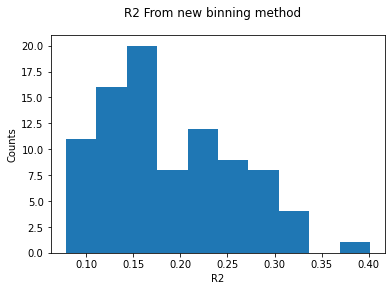

In [17]:
fig, axs = plot.subplots(1,1)
fig.suptitle("R2 From new binning method")
axs.hist(R2_df['R2'])
axs.set(xlabel = "R2")
axs.set(ylabel = "Counts")

# Uniform binnings for every variable

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
data = pd.read_csv("./CLAS12_hadronic_and_partonic.csv")

# Bin centers
x_bin_centers = np.arange(0.1,0.65,0.2)
Q2_bin_centers = np.arange(1,9,1.5)
z_bins_even = np.arange(0.15,0.85,0.1)
pt_bins_even = np.arange(0.05,1.1,0.1)
T_t_bins_even = np.arange(0.35,3.5,0.7)

x_bin_edges = np.arange(0.1,0.65,0.2)
x_bin_edges -= 0.1
x_bin_edges = np.append(x_bin_edges, x_bin_edges[-1] + 0.2)

Q2_bin_edges = np.arange(1,9,1.5,dtype = np.float64)
Q2_bin_edges -= 0.75
Q2_bin_edges = np.append(Q2_bin_edges, Q2_bin_edges[-1] + 1.5)

z_bin_edges = np.arange(0.15,0.85,0.1)
z_bin_edges -= 0.05
z_bin_edges = np.append(z_bin_edges, z_bin_edges[-1] + 0.1)

pt_bin_edges = np.arange(0.05,1.1,0.1)
pt_bin_edges -= 0.05
pt_bin_edges = np.append(pt_bin_edges, pt_bin_edges[-1] + 0.1)

T_t_bin_edges = np.arange(0.35,3.5,0.7)
T_t_bin_edges -= 0.35
T_t_bin_edges = np.append(T_t_bin_edges, T_t_bin_edges[-1] + 0.7)

In [347]:
#loop over 2d bins
df = {
    'x' : [],
    'Q' : [],
    'z' : [],
    'T_t' : [],
    'R2' : []
}
size = 100
x_empty_bins = []
Q2_empty_bins = []
z_empty_bins = []
T_t_empty_bins = []
total_empty_bins = 0
total_bins = 0
total_events = len(data)
binned_events = 0

for i in range(len(x_bin_centers)):
    curr_x_center = x_bin_centers[i]
    curr_x_edges = np.array([x_bin_edges[i],x_bin_edges[i+1]])
    for j in range(len(Q2_bin_centers)):
        curr_Q2_center = Q2_bin_centers[j]
        curr_Q2_edges = np.array([Q2_bin_edges[j],Q2_bin_edges[j+1]])
        curr_Q_center = np.sqrt(Q2_bin_centers[j])
        curr_Q_edges = np.sqrt(np.array([Q2_bin_edges[j],Q2_bin_edges[j+1]]))
        for k in range(len(z_bins_even)):
            curr_z_edges = np.array([z_bin_edges[k],z_bin_edges[k+1]])
            curr_z_center = z_bins_even[k]
            for l in range(len(T_t_bins_even)):
                curr_T_t_center = T_t_bins_even[l]
                curr_T_t_edges = np.array([T_t_bin_edges[l],T_t_bin_edges[l+1]])
                filtered_data = data[((data['Q'] > curr_Q_edges[0]) & (data['Q'] < curr_Q_edges[1])) & 
                                     ((data['x'] > curr_x_edges[0]) & (data['x'] < curr_x_edges[1])) &
                                     ((data['z'] > curr_z_edges[0]) & (data['z'] < curr_z_edges[1])) &
                                     ((data['T_t'] > curr_T_t_edges[0]) & (data['T_t'] < curr_T_t_edges[1]))
                                    ]
                binned_events += len(filtered_data)
                total_bins += 1
                if(len(filtered_data) == 0):
                    total_empty_bins += 1
                    x_empty_bins.append(curr_x_center)
                    Q2_empty_bins.append(curr_Q2_center)
                    T_t_empty_bins.append(curr_T_t_center)
                    z_empty_bins.append(curr_z_center)
                if(len(filtered_data) < size * 2):
                    continue
                samples = filtered_data.sample(n = size)
                # Do some calculations:
                samples['R2'] = (samples['M_ki'] ** 2 ) / (samples['Q'] ** 2) #assuming kf = ki + q
                df['R2'].append(samples.loc[:,'R2'].mean())
                df['x'].append(curr_x_center)
                df['Q'].append(np.sqrt(curr_q2_center))
                df['z'].append(curr_z_center)
                df['T_t'].append(curr_T_t_center)
R2_df = pd.DataFrame(df)
missed_events = total_events - binned_events
# R2_df.to_csv("R2_df.csv")

[Text(0, 0.5, 'Counts')]

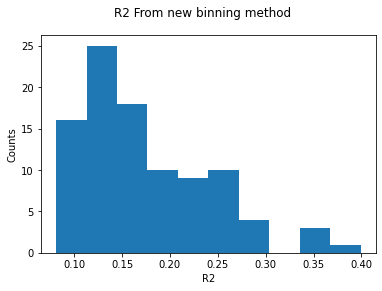

In [348]:
fig, axs = plot.subplots(1,1)
fig.suptitle("R2 From new binning method")
axs.hist(R2_df['R2'])
axs.set(xlabel = "R2")
axs.set(ylabel = "Counts")

In [349]:
print(f"{100 * total_empty_bins / total_bins}% of bins are empty")
print(f"{100 * missed_events / total_events}% of events are missed")

56.98412698412698% of bins are empty
0.5519944800551995% of events are missed


[Text(0.5, 0, 'T_t'), Text(0, 0.5, 'Q2')]

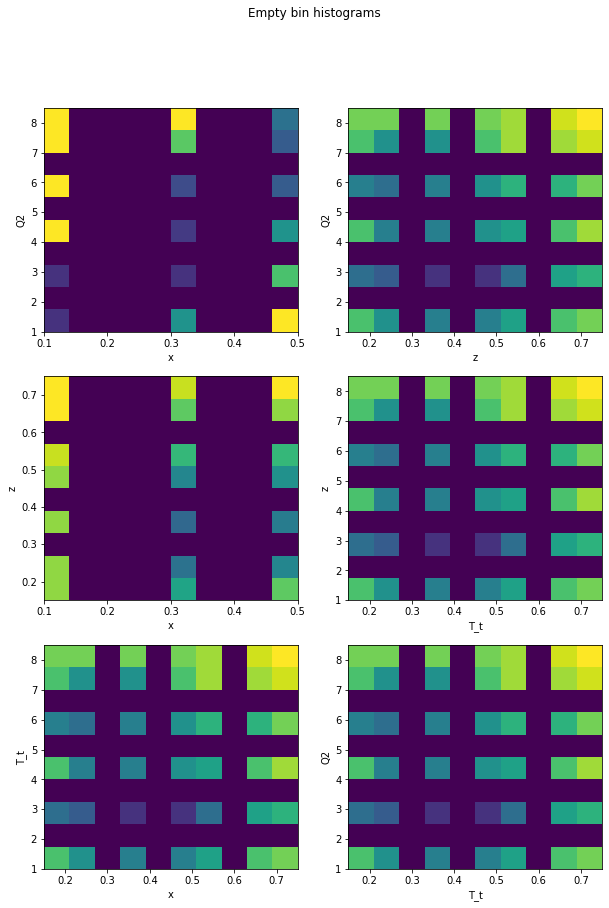

In [350]:
fig, axs = plot.subplots(3,2, figsize = (10,14))
fig.suptitle("Empty bin histograms")
axs[0,0].hist2d(x_empty_bins,Q2_empty_bins);
axs[0,0].set(xlabel = "x", ylabel = "Q2")
axs[1,0].hist2d(x_empty_bins,z_empty_bins);
axs[1,0].set(xlabel = "x", ylabel = "z")
axs[0,1].hist2d(z_empty_bins,Q2_empty_bins);
axs[0,1].set(xlabel = "z", ylabel = "Q2")
axs[1,1].hist2d(z_empty_bins,Q2_empty_bins);
axs[1,1].set(xlabel = "T_t", ylabel = "z")
axs[2,0].hist2d(z_empty_bins,Q2_empty_bins);
axs[2,0].set(xlabel = "x", ylabel = "T_t")
axs[2,1].hist2d(z_empty_bins,Q2_empty_bins);
axs[2,1].set(xlabel = "T_t", ylabel = "Q2")

In [351]:
df = data.copy()
df['R2'] = (df['M_ki'] ** 2 ) / (df['Q'] ** 2)
df['TMDAFF'] = df['R2'] < 0.3
df['TMDAFF'] = df['TMDAFF'].replace({True : 1, False : 0})

In [352]:
#loop over 2d bins
binned_df = {
    'x' : [],
    'Q' : [],
    'z' : [],
    'T_t' : [],
    'TMDAFF' : []
}

size = 100
x_empty_bins = []
Q2_empty_bins = []
z_empty_bins = []
T_t_empty_bins = []
total_empty_bins = 0
total_bins = 0
total_events = len(data)
binned_events = 0

for i in range(len(x_bin_centers)):
    curr_x_center = x_bin_centers[i]
    curr_x_edges = np.array([x_bin_edges[i],x_bin_edges[i+1]])
    for j in range(len(Q2_bin_centers)):
        curr_Q2_center = Q2_bin_centers[j]
        curr_Q2_edges = np.array([Q2_bin_edges[j],Q2_bin_edges[j+1]])
        curr_Q_center = np.sqrt(Q2_bin_centers[j])
        curr_Q_edges = np.sqrt(np.array([Q2_bin_edges[j],Q2_bin_edges[j+1]]))
        for k in range(len(z_bins_even)):
            curr_z_edges = np.array([z_bin_edges[k],z_bin_edges[k+1]])
            curr_z_center = z_bins_even[k]
            for l in range(len(T_t_bins_even)):
                curr_T_t_center = T_t_bins_even[l]
                curr_T_t_edges = np.array([T_t_bin_edges[l],T_t_bin_edges[l+1]])
                filtered_data = df[((df['Q'] > curr_Q_edges[0]) & (df['Q'] < curr_Q_edges[1])) & 
                                     ((df['x'] > curr_x_edges[0]) & (df['x'] < curr_x_edges[1])) &
                                     ((df['z'] > curr_z_edges[0]) & (df['z'] < curr_z_edges[1])) &
                                     ((df['T_t'] > curr_T_t_edges[0]) & (df['T_t'] < curr_T_t_edges[1]))
                                    ]
                if(len(filtered_data) < size * 2):
                    continue
                binned_df['x'].append(curr_x_center)
                binned_df['Q'].append(np.sqrt(curr_Q2_center))
                binned_df['z'].append(curr_z_center)
                binned_df['T_t'].append(curr_T_t_center)
                binned_df['TMDAFF'].append(filtered_data['TMDAFF'].mean())
binned_df = pd.DataFrame(binned_df)

### Do some plotting

In [366]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

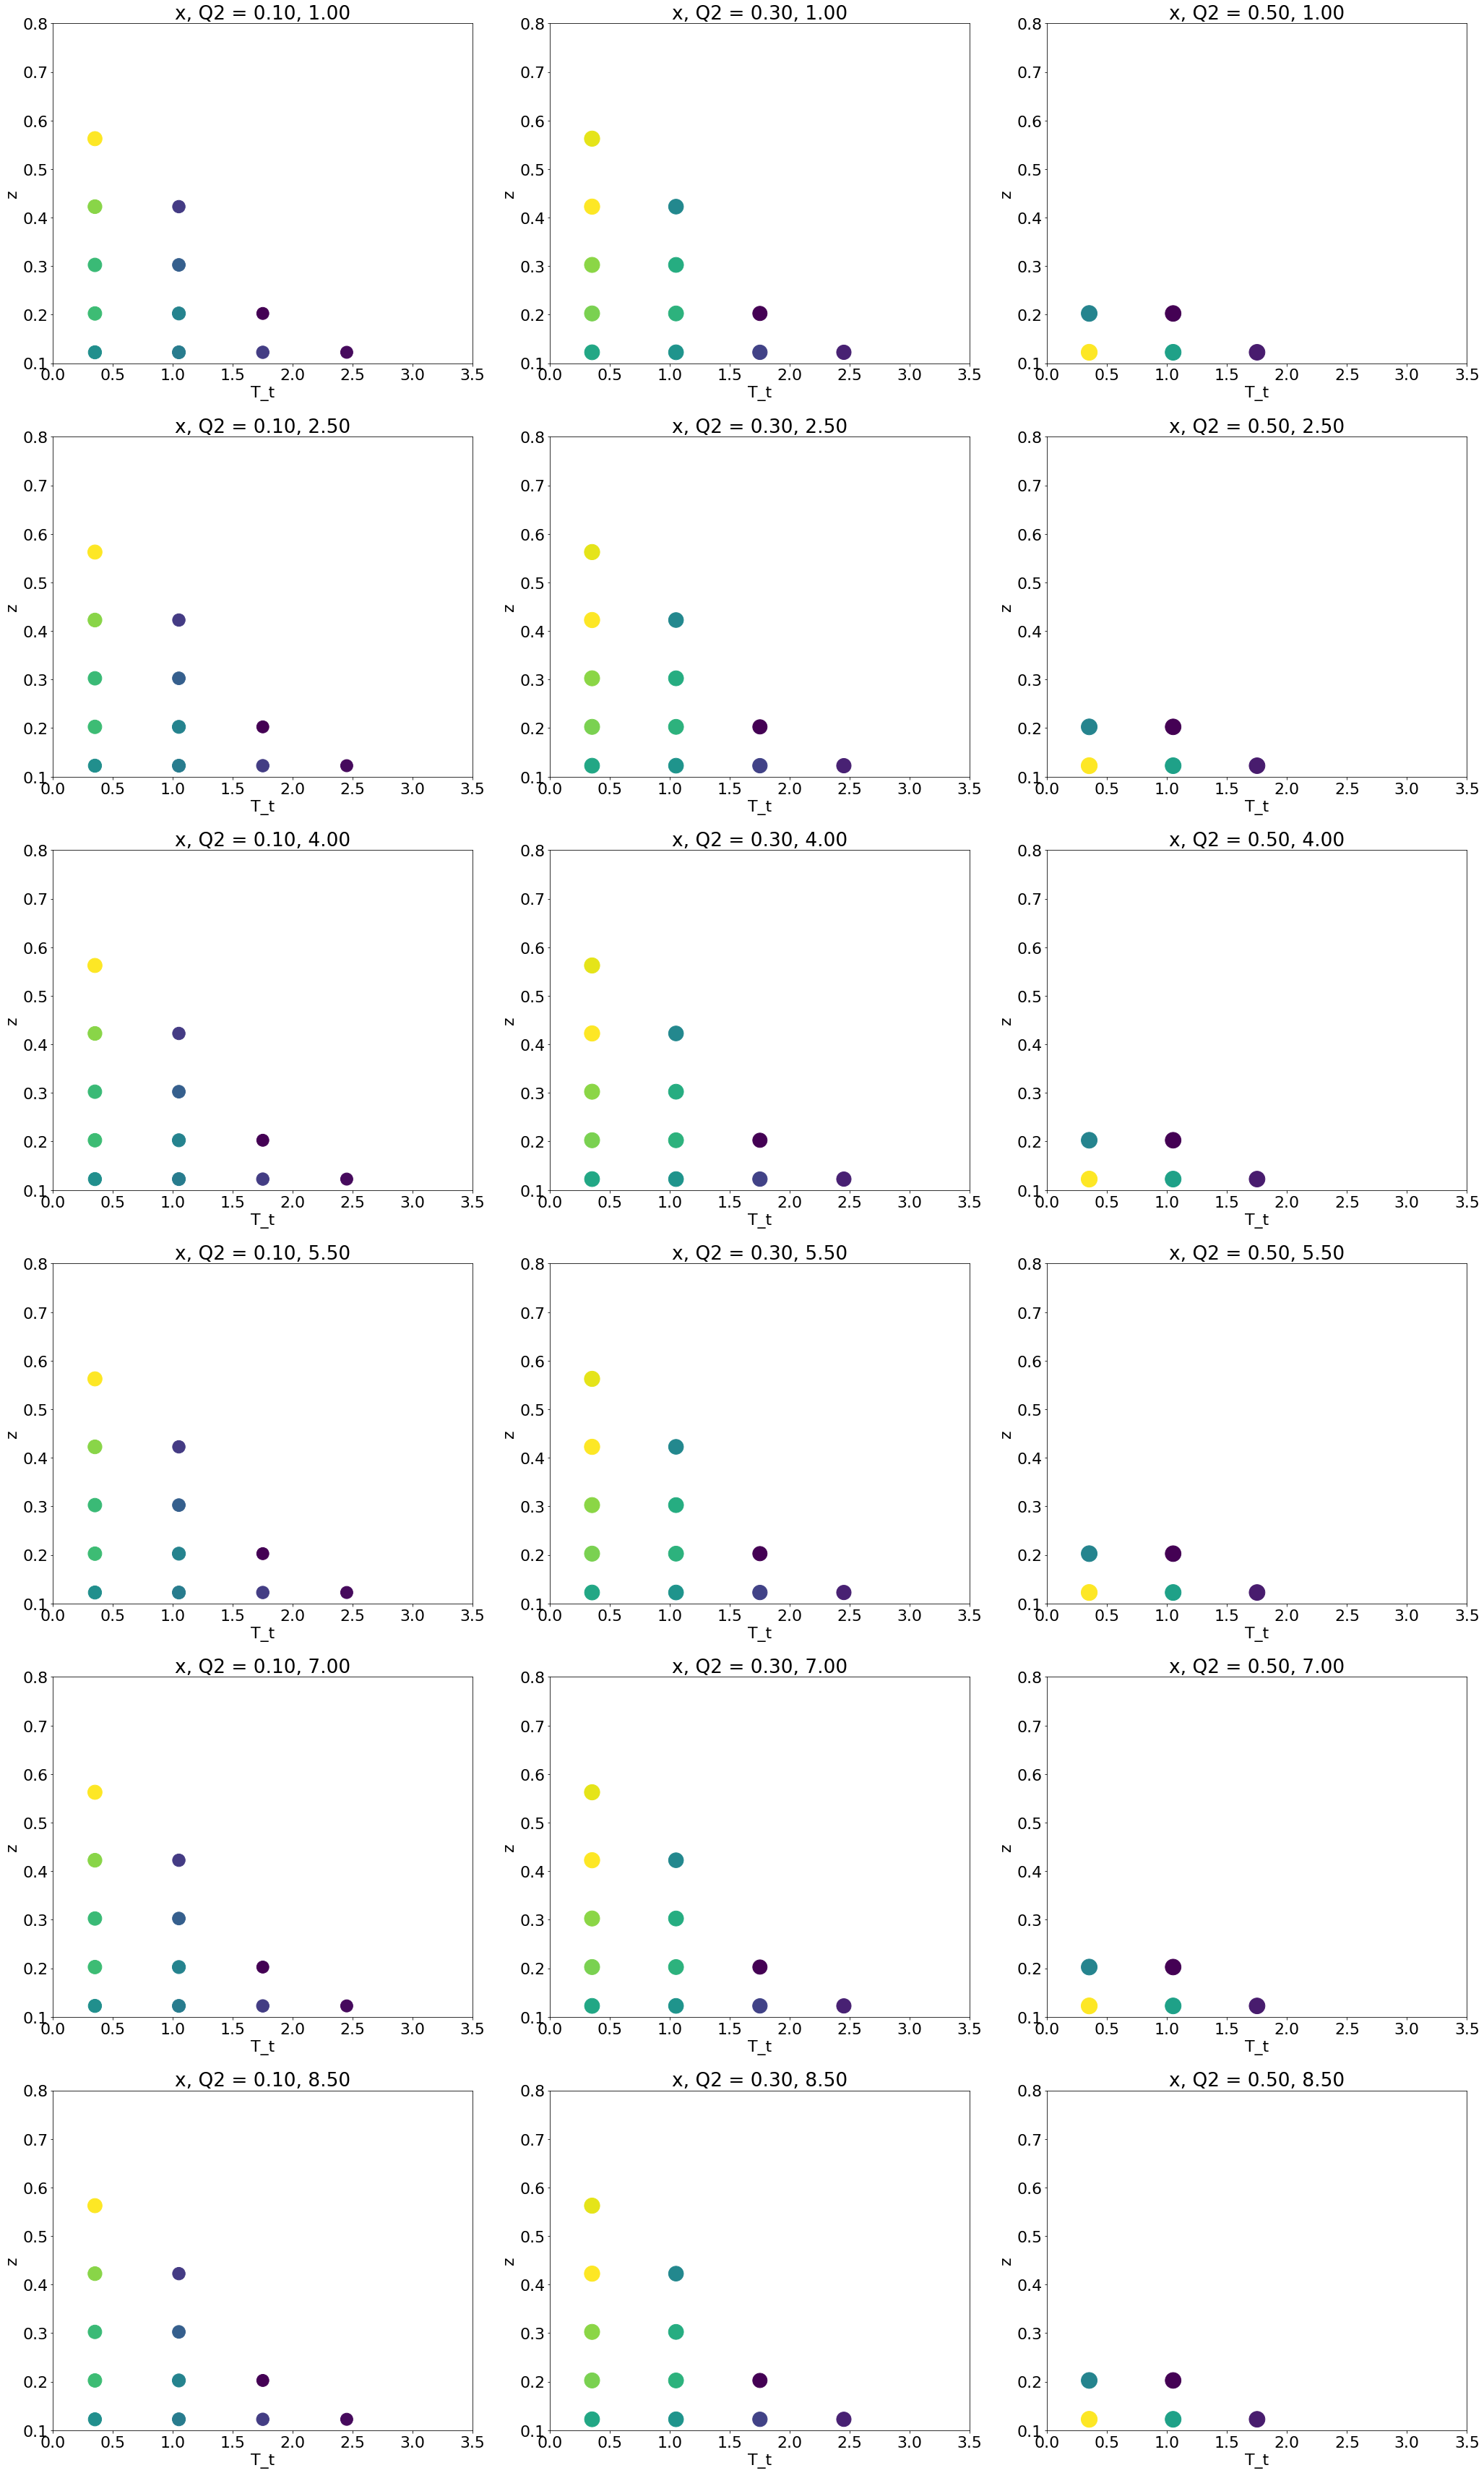

In [370]:
plotfig, plotaxs = plot.subplots(len(Q2_bin_centers),len(x_bin_centers), figsize = (len(x_bin_centers) * 8 + 5,len(Q2_bin_centers) * 8))
# plotfig.suptitle("Affinity Value (toy model) binned by x, Q2 then z, T_t")
for i, curr_x in enumerate(x_bin_centers):
    for j, curr_Q2 in enumerate(Q2_bin_centers):  
        filtered_binned_df = binned_df[
            (binned_df['x'] > x_bin_edges[i]) & (binned_df['x'] < x_bin_edges[i+1]) & 
            (binned_df['Q'] > np.sqrt(Q2_bin_edges[i])) & (binned_df['Q'] < np.sqrt(Q2_bin_edges[i+1]))
        ]
        plotaxs[j,i].scatter(filtered_binned_df['T_t'],np.square(filtered_binned_df['z']), s = filtered_binned_df['TMDAFF'] * 500, c = filtered_binned_df['TMDAFF']);
        plotaxs[j,i].set(xlabel = "T_t", ylabel = "z", title = f'x, Q2 = {curr_x:0.2f}, {curr_Q2:0.2f}')
        plotaxs[j,i].set(xlim =(T_t_bin_edges[0],T_t_bin_edges[-1]), ylim = (z_bin_edges[0],z_bin_edges[-1]), title = f'x, Q2 = {curr_x:0.2f}, {curr_Q2:0.2f}')
plotfig.tight_layout()